In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pyiast
import pandas as pd

In [21]:
df_co2 = pd.read_csv("CO2_IRMOF-1_veritable.csv")
df_ch4 = pd.read_csv("isotherm_data_ch4.csv")


3.9483178933967107
3.948148148148148


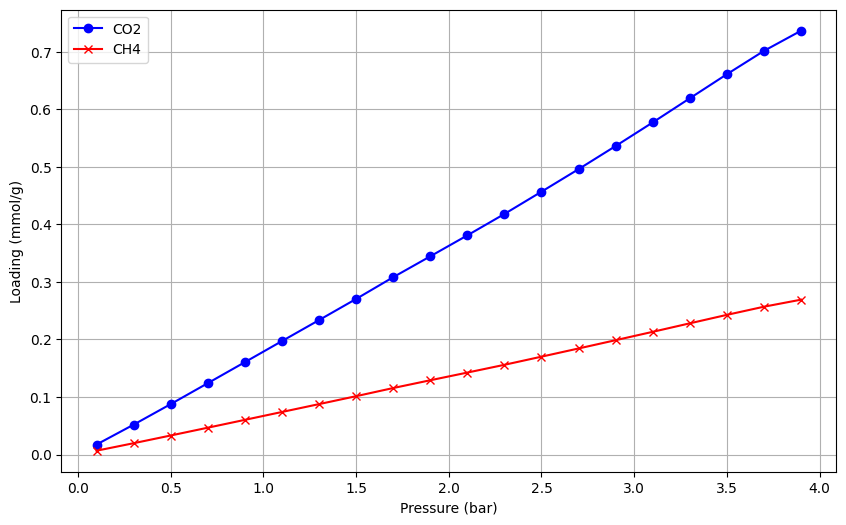

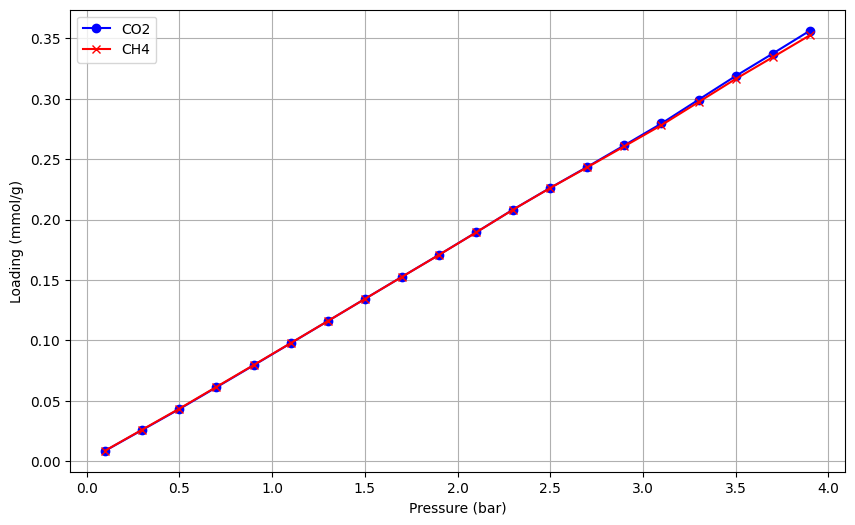

In [22]:

#CO2:CH4 proportions
yA = np.array([0.4,0.6]) 
yB = np.array([0.2,0.8])
#pressure values
p_tot = np.arange(0.1, 4.1, 0.2) 
p_partA = [yA*i for i in p_tot] #partial pressure of CO2:CH4 at each total pressure
p_partB = [yB*i for i in p_tot]

################################################### PURE q VALUES
#q values for pure ch4
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                    loading_key="Loading (mmol/g)",
                                    pressure_key="Pressure (bar)")
ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4,
                                    loading_key="Loading (mmol/g)",
                                    pressure_key="Pressure (bar)",
                                    fill_value=df_ch4['Loading (mmol/g)'].max())

#q values for pure co2
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                    loading_key="loading (mmol/g)",
                                    pressure_key="pressure (bar)")
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2,
                                    loading_key="loading (mmol/g)",
                                    pressure_key="pressure (bar)",
                                    fill_value=df_co2['loading (mmol/g)'].max()) 


################################################### BINARY MIXTURE q VALUES
#q values for CO2 and CH4 in a 0.4/0.6 mixture
q_mixA = [pyiast.iast(p_partA[i], [co2_isotherm, ch4_isotherm], verboseflag=False) for i in range(len(p_partA))]
q_CO2A = [CO2[0] for CO2 in q_mixA]
q_CH4A = [CH4[1] for CH4 in q_mixA]

q_mixB = [pyiast.iast(p_partB[i], [co2_isotherm, ch4_isotherm], verboseflag=False) for i in range(len(p_partB))]
q_CO2B = [CO2[0] for CO2 in q_mixB]
q_CH4B = [CH4[1] for CH4 in q_mixB]

################################################### SELECTIVITY

SA = (0.6/0.4)*(q_CO2A[0]/q_CH4A[0])
SB = (0.8/0.2)*(q_CO2B[0]/q_CH4B[0])



print(SA)
print(SB)

################################################### SCATTER PLOT
#plot the isotherm of mix A (CO2:CH4 = 0.4:0.6)
plt.figure(figsize=(10, 6))
plt.plot(p_tot, q_CO2A, marker='o', linestyle='-', color='b', label='CO2')
plt.plot(p_tot, q_CH4A, marker='x', linestyle='-', color='r', label='CH4')
plt.xlabel('Pressure (bar)')
plt.ylabel('Loading (mmol/g)')
plt.grid(True)
plt.legend()

#plot the isotherm of mix B (CO2:CH4 = 0.2:0.8)
plt.figure(figsize=(10, 6))
plt.plot(p_tot, q_CO2B, marker='o', linestyle='-', color='b', label='CO2')
plt.plot(p_tot, q_CH4B, marker='x', linestyle='-', color='r', label='CH4')
plt.xlabel('Pressure (bar)')
plt.ylabel('Loading (mmol/g)')
plt.grid(True)
plt.legend()


**Calculation of the selectivity and binary loading at 0.1 bar**

In [23]:
Pressure = 0.1 #set the desired total pressure in bar
y=np.array([0.4,0.6]) #arrange the proportions of CO2 then CH4
q_mix = pyiast.iast(Pressure * y, [co2_isotherm, ch4_isotherm], verboseflag=False)
print(q_mix)
S_01= (0.6/0.4)*(q_mix[0]/q_mix[1])
print(S_01)

#returns a list of two elements: [q_CO2, q_CH4]

[0.017301  0.0065728]
3.9483178933967107


**Calculation of the selectivity and binary loading at 1 bar**

In [24]:
Pressure = 1 
y=np.array([0.4,0.6]) 
q_mix = pyiast.iast(Pressure * y, [co2_isotherm, ch4_isotherm], verboseflag=False)
print(q_mix)
S_1= (0.6/0.4)*(q_mix[0]/q_mix[1])
print(S_1)

[0.1788045  0.06705721]
3.999670700562951


**Calculation of the selectivity and binary loading at 2 bars**

In [25]:
Pressure = 2 
y=np.array([0.4,0.6]) 
q_mix = pyiast.iast(Pressure * y, [co2_isotherm, ch4_isotherm], verboseflag=False)
print(q_mix)
S_2 = (0.6/0.4)*(q_mix[0]/q_mix[1])
print(S_2)

[0.36256596 0.13570145]
4.0076868701151955


**Calculation of the selectivity and binary loading at 3 bars**

In [26]:
Pressure = 3
y=np.array([0.4,0.6]) 
q_mix = pyiast.iast(Pressure * y, [co2_isotherm, ch4_isotherm], verboseflag=False)
print(q_mix)
S_3= (0.6/0.4)*(q_mix[0]/q_mix[1])
print(S_3)

[0.55665148 0.20597388]
4.053801389137781
